<a href="https://colab.research.google.com/github/Zakmansoor/Bank/blob/master/Predicting_Student_Performance_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name** : WED GHANEM   **ID** : 442801472

# Task
Analyze the "Student Performance" dataset to predict student pass/fail status using Logistic Regression and Decision Tree models, including data preprocessing, feature scaling, model evaluation, and a bonus K-means clustering analysis, and summarize the findings in a report.

## Obtain and load data

### Subtask:
Get the "Student Performance" dataset and load it into a pandas DataFrame.


In [1]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/StudentsPerformance.csv')

# Display the first 5 rows of the DataFrame
display(df.head())

# Display the information about the DataFrame
display(df.info())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


None

## Data exploration and preprocessing

### Subtask:
Inspect the dataset's structure, data types, and missing values. Calculate basic statistics for numerical features. Handle missing values. Encode categorical variables using one-hot encoding.


In [2]:
# 1. Display column names and data types
print("Column names and data types:")
display(df.info())

# 2. Check for missing values
print("\nMissing values per column:")
display(df.isnull().sum())

# 3. Calculate basic statistics for numerical features
print("\nBasic statistics for numerical columns:")
display(df.describe())

Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


None


Missing values per column:


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0



Basic statistics for numerical columns:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [3]:
# 5. Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("\nCategorical columns:")
print(categorical_cols)

# 6. Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False) # Keep all categories for now
print("\nDataFrame after one-hot encoding:")
display(df_encoded.head())

# 7. Create the 'passing' target variable
df_encoded['passing'] = ((df_encoded['math score'] >= 40) &
                         (df_encoded['reading score'] >= 40) &
                         (df_encoded['writing score'] >= 40)).astype(int)
print("\nDataFrame with 'passing' column:")
display(df_encoded.head())

# 8. Separate features (X) and target variable (y)
X = df_encoded.drop('passing', axis=1)
y = df_encoded['passing']

print("\nFeatures (X) head:")
display(X.head())
print("\nTarget variable (y) head:")
display(y.head())


Categorical columns:
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

DataFrame after one-hot encoding:


,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True
1,69,90,88,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False
2,90,95,93,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True
3,47,57,44,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True
4,76,78,75,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True



DataFrame with 'passing' column:


,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,...,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,passing
0,72,72,74,True,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,True,1
1,69,90,88,True,False,False,False,True,False,False,...,False,False,False,True,False,False,True,True,False,1
2,90,95,93,True,False,False,True,False,False,False,...,False,False,True,False,False,False,True,False,True,1
3,47,57,44,False,True,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,1
4,76,78,75,False,True,False,False,True,False,False,...,False,False,False,True,False,False,True,False,True,1



Features (X) head:


,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True
1,69,90,88,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False
2,90,95,93,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True
3,47,57,44,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True
4,76,78,75,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True



Target variable (y) head:


,passing
0,1
1,1
2,1
3,1
4,1


## Feature scaling

### Subtask:
Scale numerical features to ensure they have a similar range.


In [4]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numerical columns:")
print(numerical_cols)

Numerical columns:
['math score', 'reading score', 'writing score']


In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the numerical columns and transform them
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Display the first few rows of the scaled DataFrame
display(X.head())

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0.390024,0.193999,0.391492,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True
1,0.192076,1.427476,1.313269,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False
2,1.577711,1.770109,1.642475,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True
3,-1.259543,-0.833899,-1.583744,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True
4,0.653954,0.605158,0.457333,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True


## Split data

### Subtask:
Split the preprocessed data into training and testing sets.


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800, 20)
Shape of X_test: (200, 20)
Shape of y_train: (800,)
Shape of y_test: (200,)


## Train and evaluate logistic regression model

### Subtask:
Build and train a logistic regression model. Evaluate the model's performance using accuracy, precision, and recall.


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Instantiate a LogisticRegression model
lr_model = LogisticRegression(random_state=42)

# Train the logistic regression model
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = lr_model.predict(X_test)

# Calculate and print accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

# Calculate and print precision
precision_lr = precision_score(y_test, y_pred_lr)
print(f"Logistic Regression Precision: {precision_lr:.4f}")

# Calculate and print recall
recall_lr = recall_score(y_test, y_pred_lr)
print(f"Logistic Regression Recall: {recall_lr:.4f}")

Logistic Regression Accuracy: 0.9900
Logistic Regression Precision: 0.9894
Logistic Regression Recall: 1.0000


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Train and evaluate decision tree classifier

### Subtask:
Train a decision tree classifier. Compare its performance with the logistic regression model. Visualize the decision tree.


Decision Tree Accuracy: 0.9950
Decision Tree Precision: 1.0000
Decision Tree Recall: 0.9947

Comparison with Logistic Regression:
Logistic Regression Accuracy: 0.9900
Decision Tree Accuracy: 0.9950
Logistic Regression Precision: 0.9894
Decision Tree Precision: 1.0000
Logistic Regression Recall: 1.0000
Decision Tree Recall: 0.9947


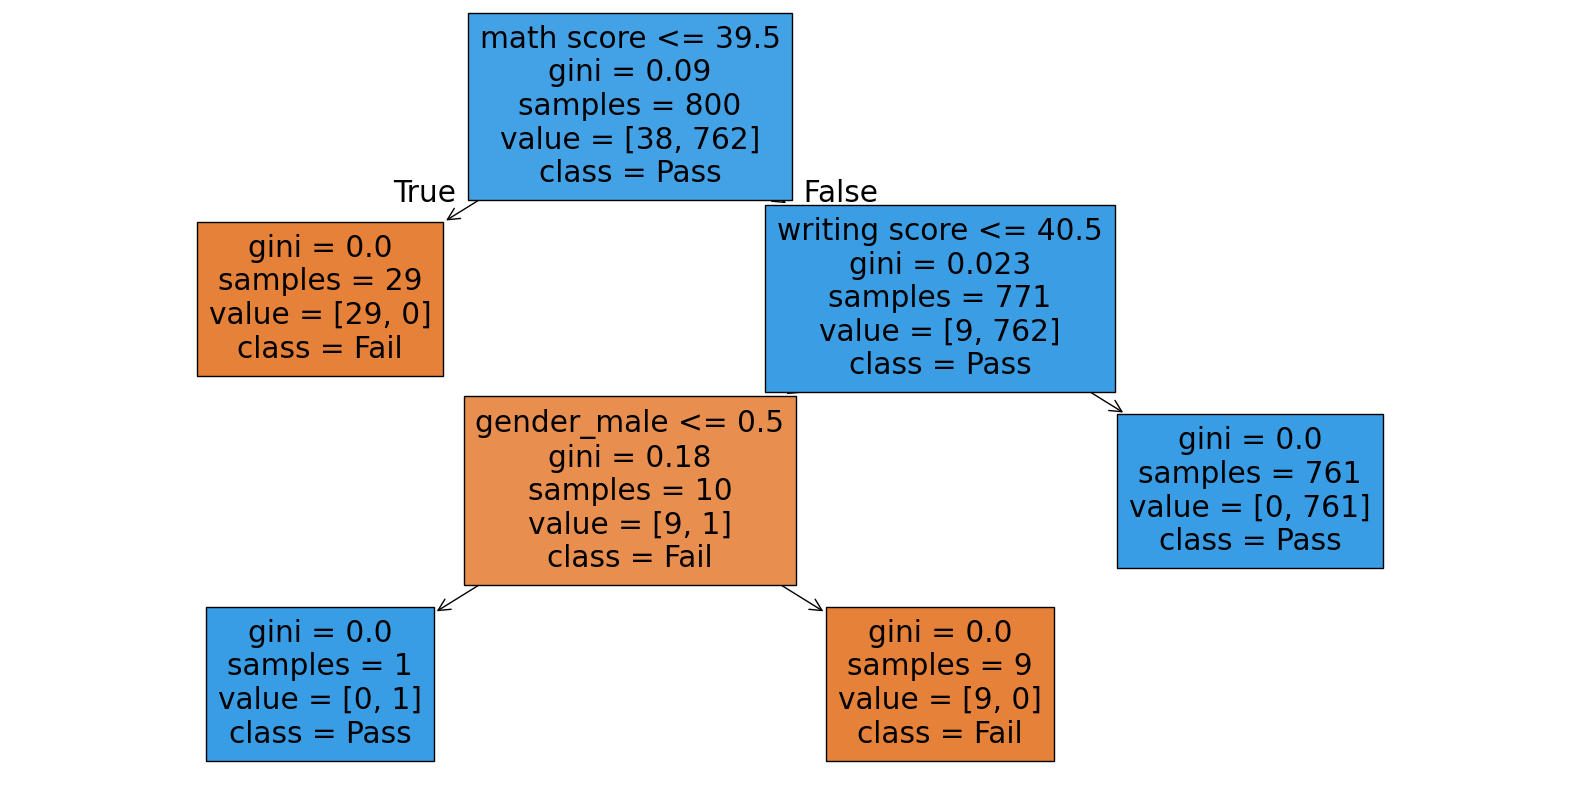

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Instantiate a DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)

# Print the metrics
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree Precision: {precision_dt:.4f}")
print(f"Decision Tree Recall: {recall_dt:.4f}")

# Compare with Logistic Regression
print("\nComparison with Logistic Regression:")
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Logistic Regression Precision: {precision_lr:.4f}")
print(f"Decision Tree Precision: {precision_dt:.4f}")
print(f"Logistic Regression Recall: {recall_lr:.4f}")
print(f"Decision Tree Recall: {recall_dt:.4f}")

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns.tolist(), filled=True, class_names=['Fail', 'Pass'])
plt.show()

## K-means clustering (bonus)

### Subtask:
Apply K-means clustering to segment students. Use the elbow method to find the optimal number of clusters. Visualize the clusters.


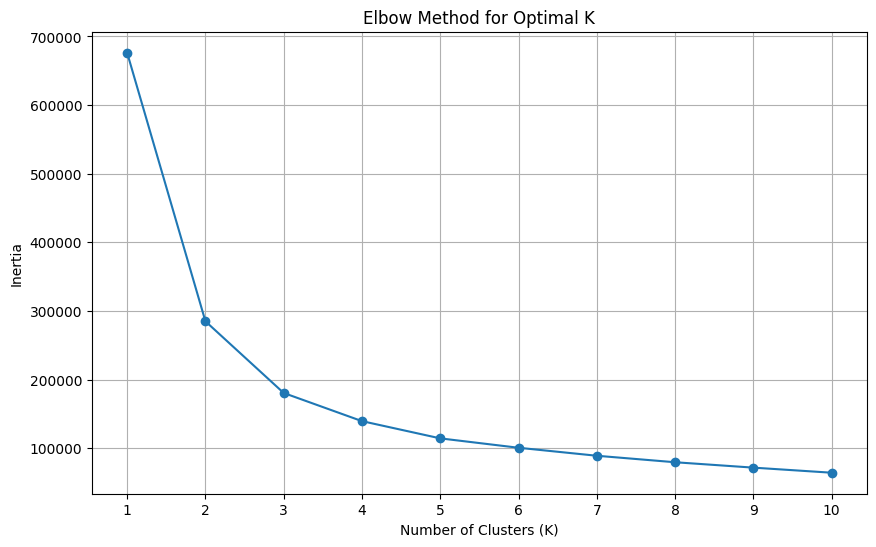

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Apply the elbow method
inertia = []
k_range = range(1, 11) # Iterate from 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init explicitly
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

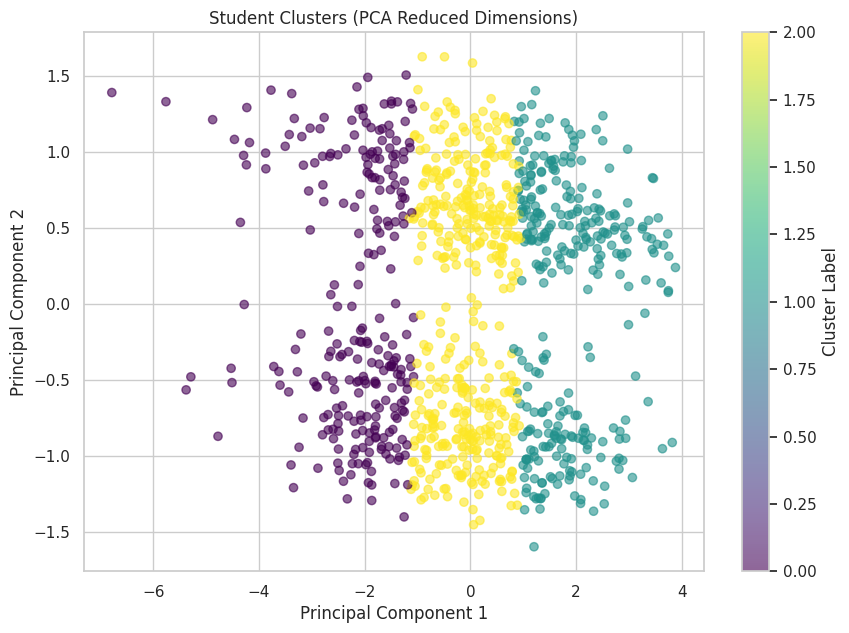

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Cluster
0,female,group B,bachelor's degree,standard,none,72,72,74,2
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,2


In [ ]:
# @title
from sklearn.decomposition import PCA

# Based on the elbow plot, choose an optimal number of clusters (e.g., 3)
optimal_k = 3

# Train a KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)

# Add the cluster labels as a new column to the original DataFrame df
df['Cluster'] = cluster_labels

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot of the two PCA components, coloring by cluster labels
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Student Clusters (PCA Reduced Dimensions)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()

# Display the first few rows of the DataFrame with the new 'Cluster' column
display(df.head())